
Enter Your Choice:
	1. User-Input
	2. Hard-Coded Example: 1

Enter Vertices In X Graph: 4

Enter Vertices In Y Graph: 5

How many Edges in Your graph? 7

Enter Source from X (0...X-1 vertices): 0

Enter Target from Y (0...Y-1 vertices): 1

Enter Source from X (0...X-1 vertices): 0

Enter Target from Y (0...Y-1 vertices): 2

Enter Source from X (0...X-1 vertices): 0

Enter Target from Y (0...Y-1 vertices): 3

Enter Source from X (0...X-1 vertices): 1

Enter Target from Y (0...Y-1 vertices): 2

Enter Source from X (0...X-1 vertices): 2

Enter Target from Y (0...Y-1 vertices): 4

Enter Source from X (0...X-1 vertices): 3

Enter Target from Y (0...Y-1 vertices): 4

Enter Source from X (0...X-1 vertices): 3

Enter Target from Y (0...Y-1 vertices): 0


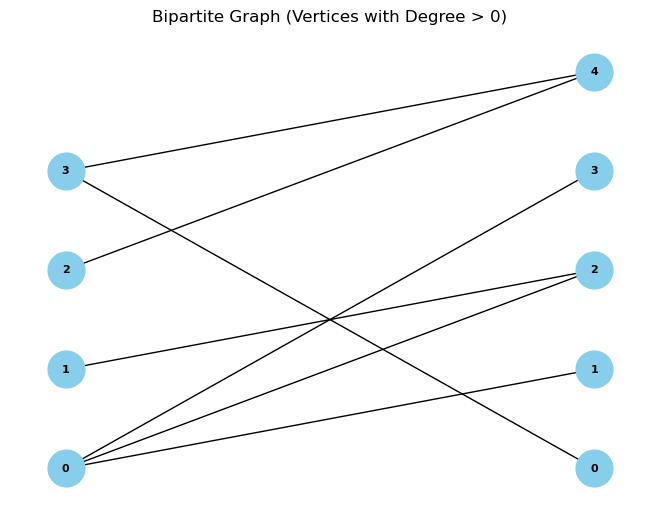

Maximum Matching after Augmenting Path Algorithm: 4
Edges in Maximum Matching:
(0, 1)
(1, 2)
(2, 4)
(3, 0)


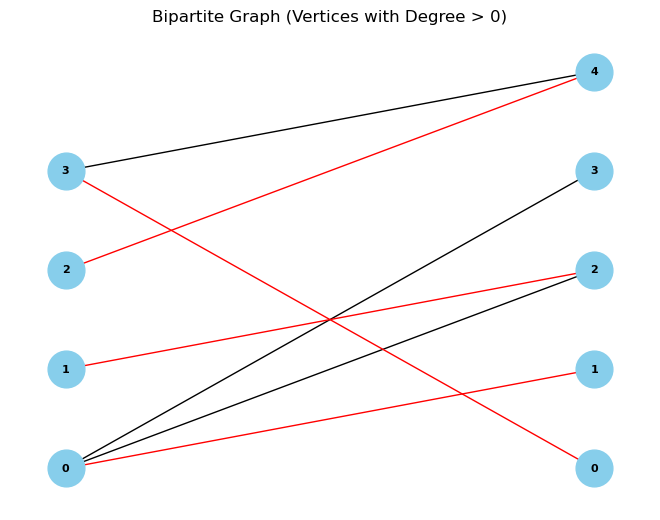

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

class BipartiteGraph:
    def __init__(self, x=0, y=0):
        self.X = x
        self.Y = y
        self.MAX = 100
        self.edges = [[0] * self.MAX for _ in range(self.MAX)]
        self.matchX = [-1] * self.MAX
        self.matchY = [-1] * self.MAX
        self.visitedX = [False] * self.MAX
        self.visitedY = [False] * self.MAX

    def add_edge(self, x, y):
        if x != y:
            self.edges[x][y] = 1

    def dfs(self, x, visited_y):
        for y in range(self.Y):
            if self.edges[x][y] and not visited_y[y]:
                visited_y[y] = True
                if self.matchY[y] == -1 or (not self.visitedX[self.matchY[y]] and self.dfs(self.matchY[y], visited_y)):
                    self.matchX[x] = y
                    self.matchY[y] = x
                    return True
        return False

    def augment_path(self, x):
        visited_y = [False] * self.MAX
        if self.dfs(x, visited_y):
            y = self.matchX[x]
            while y != -1:
                next_x = self.matchY[y]
                self.matchX[next_x] = -1
                self.matchY[y] = -1
                y = self.matchX[next_x]

    def max_matching(self):
        result = 0
        for i in range(self.MAX):
            self.visitedX[i] = False
            self.visitedY[i] = False

        for x in range(self.X):
            if not self.visitedX[x] and self.matchX[x] == -1:
                visited_y = [False] * self.MAX
                if self.dfs(x, visited_y):
                    result += 1
                    self.visitedX[x] = True
        return result

    def print_maximum_matching_edges(self):
        print("Edges in Maximum Matching:")
        for x in range(self.X):
            if self.matchX[x] != -1:
                print(f"({x}, {self.matchX[x]})")

    def augmenting_path_algorithm(self):
        for x in range(self.X):
            if not self.visitedX[x] and self.matchX[x] == -1:
                self.augment_path(x)

    def display_graph(self, matching_edges=None):
        G = nx.Graph()

        # Add nodes from set X and Y
        G.add_nodes_from(range(self.X), bipartite=0)
        G.add_nodes_from(range(self.X, self.X + self.Y), bipartite=1)

        # Add edges to the graph
        for x in range(self.X):
            for y in range(self.Y):
                if self.edges[x][y] == 1:
                    G.add_edge(x, self.X + y)

        # Get nodes with degree > 0
        nodes_with_degree = [node for node, degree in dict(G.degree()).items() if degree > 0]

        # Create a subgraph with selected nodes
        subgraph = G.subgraph(nodes_with_degree)

        # Set positions for bipartite layout
        pos = {node: (0, i) for i, node in enumerate(range(self.X))}
        pos.update({node: (1, i) for i, node in enumerate(range(self.X, self.X + self.Y))})

        # Draw the graph without labels for degree 0 vertices in set X
        labels = {node: node if node < self.X and G.degree(node) > 0 else "" for node in range(self.X)}
        labels.update({node: node - self.X for node in range(self.X, self.X + self.Y) if G.degree(node) > 0})

        # Draw edges in different colors based on whether they are part of the maximum matching
        edge_colors = ["black" if matching_edges is None or edge not in matching_edges else "red" for edge in subgraph.edges()]

        nx.draw(subgraph, pos, with_labels=True, labels=labels, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", edge_color=edge_colors)
        plt.title("Bipartite Graph (Vertices with Degree > 0)")
        plt.show()

def user_input_graph():
    x = int(input("\nEnter Vertices In X Graph: "))
    y = int(input("\nEnter Vertices In Y Graph: "))
    return BipartiteGraph(x, y)


def main():
    ch = input("\nEnter Your Choice:\n\t1. User-Input\n\t2. Hard-Coded Example: ")

    if ch == '1':
        graph = user_input_graph()
        x = int(input("\nHow many Edges in Your graph? "))
        if x > 0:
            for i in range(x):
                s = int(input("\nEnter Source from X (0...X-1 vertices): "))
                t = int(input("\nEnter Target from Y (0...Y-1 vertices): "))
                graph.add_edge(s, t)
    elif ch == '2':
        # Hard-coded example
        X = 13  # Number of vertices in set X
        Y = 13  # Number of vertices in set Y
        graph = BipartiteGraph(X, Y)
        # Add edges to the bipartite graph
        graph.add_edge(0, 7)
        graph.add_edge(1, 8)
        graph.add_edge(2, 7)
        graph.add_edge(3, 7)
        graph.add_edge(3, 8)
        graph.add_edge(3, 9)
        graph.add_edge(4, 8)
        graph.add_edge(4, 9)
        graph.add_edge(5, 9)
        graph.add_edge(5, 10)
        graph.add_edge(6, 8)
        graph.add_edge(6, 11)
        graph.add_edge(6, 12)
    else:
        print("\nWrong Input....")
        return

    graph.display_graph()

    # Run the augmenting path algorithm
    graph.augmenting_path_algorithm()
    max_matching = graph.max_matching()
    print(f"Maximum Matching after Augmenting Path Algorithm: {max_matching}")

    # Print the edges in the maximum matching
    graph.print_maximum_matching_edges()

    # Re-display the graph and mark the edges of the maximum matching with different colors
    graph.display_graph(matching_edges=set((x, graph.matchX[x] + graph.X) for x in range(graph.X) if graph.matchX[x] != -1))

if __name__ == "__main__":
    main()


### 


Enter Your Choice:
	1. User-Input
	2. Hard-Coded Example: 2


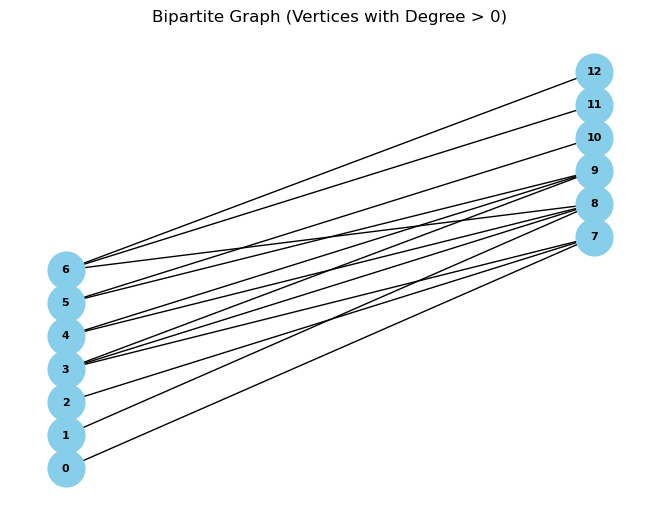

Maximum Matching after Augmenting Path Algorithm: 5
Edges in Maximum Matching:
(0, 7)
(1, 8)
(3, 9)
(5, 10)
(6, 11)


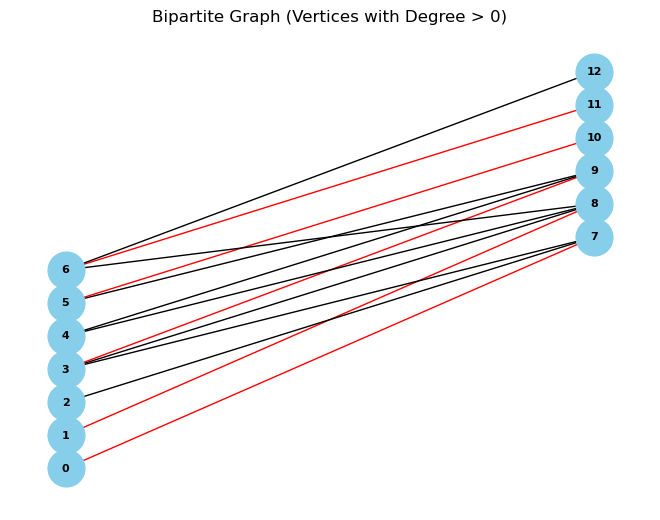

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

class BipartiteGraph:
    def __init__(self, x=0, y=0):
        self.X = x
        self.Y = y
        self.MAX = 100
        self.edges = [[0] * self.MAX for _ in range(self.MAX)]
        self.matchX = [-1] * self.MAX
        self.matchY = [-1] * self.MAX
        self.visitedX = [False] * self.MAX
        self.visitedY = [False] * self.MAX

    def add_edge(self, x, y):
        if x != y:
            self.edges[x][y] = 1

    def dfs(self, x, visited_y):
        for y in range(self.Y):
            if self.edges[x][y] and not visited_y[y]:
                visited_y[y] = True
                if self.matchY[y] == -1 or (not self.visitedX[self.matchY[y]] and self.dfs(self.matchY[y], visited_y)):
                    self.matchX[x] = y
                    self.matchY[y] = x
                    return True
        return False

    def augment_path(self, x):
        visited_y = [False] * self.MAX
        if self.dfs(x, visited_y):
            y = self.matchX[x]
            while y != -1:
                next_x = self.matchY[y]
                self.matchX[next_x] = -1
                self.matchY[y] = -1
                y = self.matchX[next_x]

    def max_matching(self):
        result = 0
        for i in range(self.MAX):
            self.visitedX[i] = False
            self.visitedY[i] = False

        for x in range(self.X):
            if not self.visitedX[x] and self.matchX[x] == -1:
                visited_y = [False] * self.MAX
                if self.dfs(x, visited_y):
                    result += 1
                    self.visitedX[x] = True
        return result

    def print_maximum_matching_edges(self):
        print("Edges in Maximum Matching:")
        for x in range(self.X):
            if self.matchX[x] != -1:
                print(f"({x}, {self.matchX[x]})")

    def augmenting_path_algorithm(self):
        for x in range(self.X):
            if not self.visitedX[x] and self.matchX[x] == -1:
                self.augment_path(x)

    def display_graph(self, matching_edges=None):
        G = nx.Graph()

        # Add nodes from set X and Y
        G.add_nodes_from(range(self.X), bipartite=0)
        G.add_nodes_from(range(self.X, self.X + self.Y), bipartite=1)

        # Add edges to the graph
        for x in range(self.X):
            for y in range(self.Y):
                if self.edges[x][y] == 1:
                    G.add_edge(x, self.X + y)

        # Get nodes with degree > 0
        nodes_with_degree = [node for node, degree in dict(G.degree()).items() if degree > 0]

        # Create a subgraph with selected nodes
        subgraph = G.subgraph(nodes_with_degree)

        # Set positions for bipartite layout
        pos = {node: (0, i) for i, node in enumerate(range(self.X))}
        pos.update({node: (1, i) for i, node in enumerate(range(self.X, self.X + self.Y))})

        # Draw the graph without labels for degree 0 vertices in set X
        labels = {node: node if node < self.X and G.degree(node) > 0 else "" for node in range(self.X)}
        labels.update({node: node - self.X for node in range(self.X, self.X + self.Y) if G.degree(node) > 0})

        # Draw edges in different colors based on whether they are part of the maximum matching
        edge_colors = ["black" if matching_edges is None or edge not in matching_edges else "red" for edge in subgraph.edges()]

        nx.draw(subgraph, pos, with_labels=True, labels=labels, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", edge_color=edge_colors)
        plt.title("Bipartite Graph (Vertices with Degree > 0)")
        plt.show()

def user_input_graph():
    x = int(input("\nEnter Vertices In X Graph: "))
    y = int(input("\nEnter Vertices In Y Graph: "))
    return BipartiteGraph(x, y)


def main():
    ch = input("\nEnter Your Choice:\n\t1. User-Input\n\t2. Hard-Coded Example: ")

    if ch == '1':
        graph = user_input_graph()
        x = int(input("\nHow many Edges in Your graph? "))
        if x > 0:
            for i in range(x):
                s = int(input("\nEnter Source from X (0...X-1 vertices): "))
                t = int(input("\nEnter Target from Y (0...Y-1 vertices): "))
                graph.add_edge(s, t)
    elif ch == '2':
        # Hard-coded example
        X = 13  # Number of vertices in set X
        Y = 13  # Number of vertices in set Y
        graph = BipartiteGraph(X, Y)
        # Add edges to the bipartite graph
        graph.add_edge(0, 7)
        graph.add_edge(1, 8)
        graph.add_edge(2, 7)
        graph.add_edge(3, 7)
        graph.add_edge(3, 8)
        graph.add_edge(3, 9)
        graph.add_edge(4, 8)
        graph.add_edge(4, 9)
        graph.add_edge(5, 9)
        graph.add_edge(5, 10)
        graph.add_edge(6, 8)
        graph.add_edge(6, 11)
        graph.add_edge(6, 12)
    else:
        print("\nWrong Input....")
        return

    graph.display_graph()

    # Run the augmenting path algorithm
    graph.augmenting_path_algorithm()
    max_matching = graph.max_matching()
    print(f"Maximum Matching after Augmenting Path Algorithm: {max_matching}")

    # Print the edges in the maximum matching
    graph.print_maximum_matching_edges()

    # Re-display the graph and mark the edges of the maximum matching with different colors
    graph.display_graph(matching_edges=set((x, graph.matchX[x] + graph.X) for x in range(graph.X) if graph.matchX[x] != -1))

if __name__ == "__main__":
    main()
